In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the CPU Usage of Broker-1
df1b = pd.read_csv("Brok1cpu_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-08-11 18:33:43,62.148743,my-cluster-metrics-kafka-0
1,2021-08-11 18:34:01,65.121266,my-cluster-metrics-kafka-0
2,2021-08-11 18:34:15,66.184659,my-cluster-metrics-kafka-0


In [2]:
#Average CPU Usage before rebalancing
cpubr1 = df1b[(df1b['timestamp'] >= '2021-08-11 18:37:11') & (df1b['timestamp'] <= '2021-08-11 19:06:00')]
cpubr1.head(3)
cpubr1avg = cpubr1['values'].mean()
print(cpubr1avg)
cpubr1.describe()

224.41016249250006


,values
count,116.000000
mean,224.410162
std,76.548617
min,93.274625
25%,158.380909
50%,222.802573
75%,287.969844
max,352.367211


In [3]:
#Average CPU Usage During rebalancing
cpudr1 = df1b[(df1b['timestamp'] >= '2021-08-11 19:07:00') & (df1b['timestamp'] <= '2021-08-11 19:10:00')]
cpudr1.head(3)
cpudr1avg = cpudr1['values'].mean()
print(cpudr1avg)
cpudr1.describe()

372.26716889999994


,values
count,12.000000
mean,372.267169
std,8.382179
min,359.861037
25%,364.901191
50%,372.778699
75%,379.242179
max,384.049991


In [4]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1cpu = ttest_ind(cpudr1['values'], cpubr1['values'])
print(resb1cpu)

Ttest_indResult(statistic=6.6635650237917705, pvalue=7.482303589984812e-10)


In [5]:
cpubr1.drop(['pod'], axis=1, inplace=True)
cpubr1.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 14 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  116 non-null    datetime64[ns]
 1   values     116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
cpudr1.drop(['pod'], axis=1, inplace=True)
cpudr1.head(10)
cpudr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 134 to 145
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12 non-null     datetime64[ns]
 1   values     12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


Text(0.5, 1.0, 'Broker1 CPU Usage')

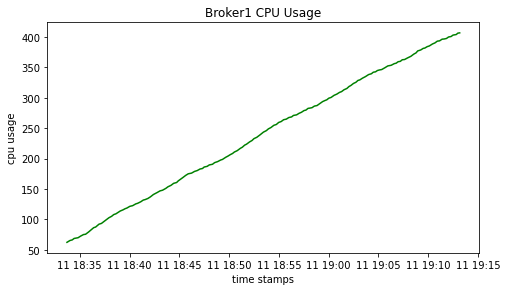

In [7]:
from datetime import datetime
#CPU Usage for the entire load test
c1=[]
for dat in df1b.timestamp:
    # print (dat)
    c1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(c1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('cpu usage')
axe1.set_title('Broker1 CPU Usage')
#fig1.tight_layout()

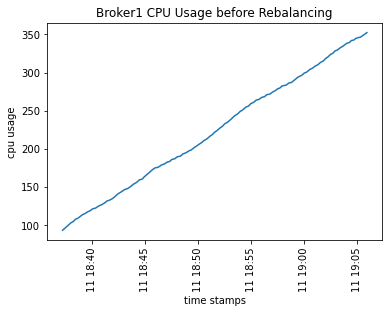

In [8]:
#CPU Usage before rebalancing
b1=[]
for dat in cpubr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,cpubr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage before Rebalancing')
plt.show()

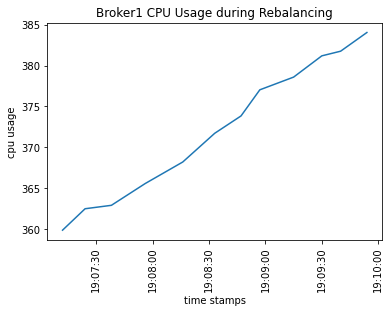

In [9]:
#CPU Usage during rebalancing
d1=[]
for dat in cpudr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,cpudr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker1 CPU Usage during Rebalancing')
plt.show()

In [10]:
# DA on the CPU Usage of Broker-2
df2b = pd.read_csv("Brok2cpu_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-08-11 18:34:14,67.222922,my-cluster-metrics-kafka-1
1,2021-08-11 18:34:28,69.782054,my-cluster-metrics-kafka-1
2,2021-08-11 18:34:44,70.478150,my-cluster-metrics-kafka-1


In [11]:
#Average CPU Usage before rebalancing
cpubr2 = df2b[(df1b['timestamp'] >= '2021-08-11 18:37:11') & (df2b['timestamp'] <= '2021-08-11 19:06:00')]
cpubr2.head(3)
cpubr2avg = cpubr2['values'].mean()
print(cpubr2avg)
cpubr2.describe()

226.80605887547827


,values
count,115.000000
mean,226.806059
std,73.464406
min,99.623333
25%,163.541648
50%,227.240003
75%,284.716096
max,355.125234


In [12]:
#Average CPU Usage During rebalancing
cpudr2 = df2b[(df2b['timestamp'] >= '2021-08-11 19:07:00') & (df2b['timestamp'] <= '2021-08-11 19:10:00')]
cpudr2.head(3)
cpudr2avg = cpudr2['values'].mean()
print(cpudr2avg)
cpudr2.describe()

374.4102815416666


,values
count,12.000000
mean,374.410282
std,9.197894
min,362.520436
25%,366.767463
50%,373.630044
75%,382.901504
max,387.391637


In [13]:
#T-Stats Analysis
resb2cpu = ttest_ind(cpudr2['values'], cpubr2['values'])
print(resb2cpu)

Ttest_indResult(statistic=6.930010262756171, pvalue=1.9838599407838237e-10)


In [14]:
cpubr2.drop(['pod'], axis=1, inplace=True)
cpubr2.head(10)
cpubr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 14 to 129
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  116 non-null    datetime64[ns]
 1   values     116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
cpudr2.drop(['pod'], axis=1, inplace=True)
cpudr2.head(10)
cpudr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 132 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12 non-null     datetime64[ns]
 1   values     12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


Text(0.5, 1.0, 'Broker2 CPU Usage')

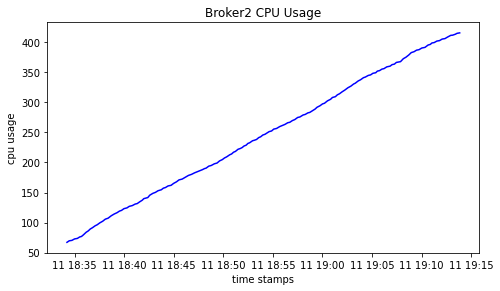

In [16]:
from datetime import datetime
#CPU Usage for the entire load test
c2=[]
for dat in df2b.timestamp:
    # print (dat)
    c2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(c2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('cpu usage')
axe2.set_title('Broker2 CPU Usage')
#fig1.tight_layout()

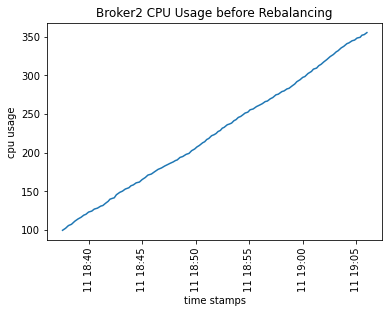

In [17]:
#CPU Usage before rebalancing
b2=[]
for dat in cpubr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,cpubr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage before Rebalancing')
plt.show()

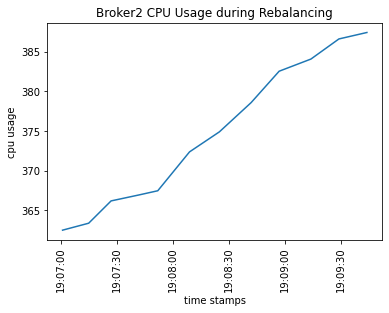

In [18]:
#CPU Usage during rebalancing
d2=[]
for dat in cpudr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,cpudr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker2 CPU Usage during Rebalancing')
plt.show()

In [19]:
# DA on the CPU Usage of Broker-3
df3b = pd.read_csv("Brok3cpu_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-08-11 18:34:42,79.155252,my-cluster-metrics-kafka-2
1,2021-08-11 18:34:57,81.644691,my-cluster-metrics-kafka-2
2,2021-08-11 18:35:13,82.483526,my-cluster-metrics-kafka-2


In [20]:
#Average CPU Usage before rebalancing
cpubr3 = df3b[(df3b['timestamp'] >= '2021-08-11 18:37:11') & (df3b['timestamp'] <= '2021-08-11 19:06:00')]
cpubr3.head(3)
cpubr3avg = cpubr3['values'].mean()
print(cpubr3avg)
cpubr3.describe()

234.39354849137925


,values
count,116.000000
mean,234.393548
std,74.946012
min,103.976233
25%,170.216904
50%,234.431504
75%,297.559183
max,358.907406


In [21]:
#Average CPU Usage During rebalancing
cpudr3 = df3b[(df3b['timestamp'] >= '2021-08-11 19:07:00') & (df3b['timestamp'] <= '2021-08-11 19:10:00')]
cpudr3.head(3)
cpudr3avg = cpudr3['values'].mean()
print(cpudr3avg)
cpudr3.describe()

379.6903020916666


,values
count,12.000000
mean,379.690302
std,8.709043
min,367.310424
25%,372.353244
50%,380.074507
75%,386.882141
max,393.603587


In [22]:
#T-Stats Analysis
resb3cpu = ttest_ind(cpudr3['values'], cpubr3['values'])
print(resb1cpu)

Ttest_indResult(statistic=6.6635650237917705, pvalue=7.482303589984812e-10)


In [23]:
cpubr3.drop(['pod'], axis=1, inplace=True)
cpubr3.head(10)
cpubr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 10 to 125
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  116 non-null    datetime64[ns]
 1   values     116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
cpudr3.drop(['pod'], axis=1, inplace=True)
cpudr3.head(10)
cpudr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 130 to 141
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  12 non-null     datetime64[ns]
 1   values     12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes


Text(0.5, 1.0, 'Broker3 CPU Usage')

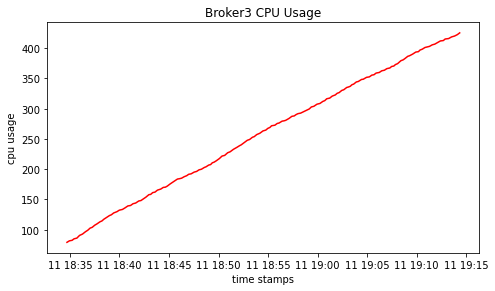

In [25]:
from datetime import datetime
#CPU Usage for the entire load test
c3=[]
for dat in df3b.timestamp:
    # print (dat)
    c3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(c3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('cpu usage')
axe3.set_title('Broker3 CPU Usage')
#fig1.tight_layout()

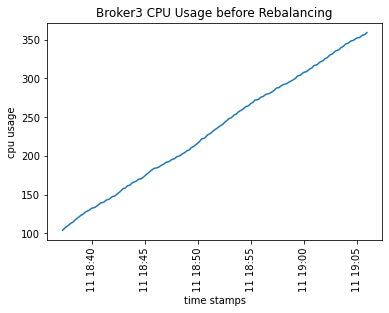

In [26]:
#CPU Usage before rebalancing
b3=[]
for dat in cpubr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,cpubr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage before Rebalancing')
plt.show()

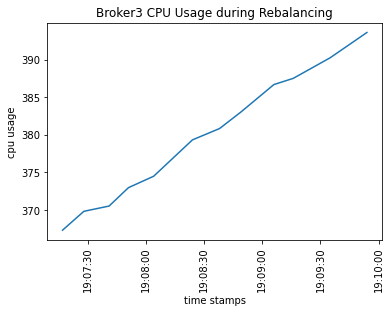

In [27]:
#CPU Usage during rebalancing
d3=[]
for dat in cpudr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('Broker3 CPU Usage during Rebalancing')
plt.show()

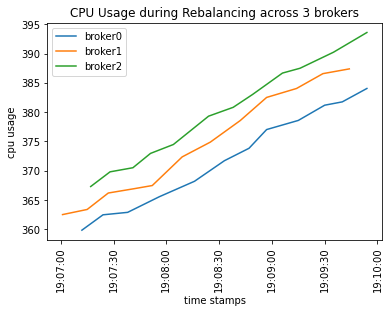

In [28]:
plt.plot(d1,cpudr1['values'])
plt.plot(d2,cpudr2['values'])
plt.plot(d3,cpudr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('CPU Usage during Rebalancing across 3 brokers')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()

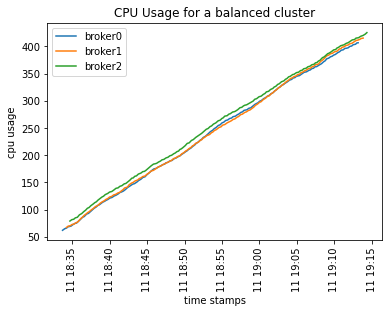

In [29]:
plt.plot(c1,df1b['values'])
plt.plot(c2,df2b['values'])
plt.plot(c3,df3b['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('cpu usage')
plt.title('CPU Usage for a balanced cluster')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()